In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


input_file_dir = "C:/Users/sherm/Desktop/workspace/LikeLion_Mid_team_14/data/raw/"
output_file_dir = "C:/Users/sherm/Desktop/workspace/LikeLion_Mid_team_14/data/processed/"
# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
df = pd.read_csv(input_file_dir+'경찰청_연도별 음주운전 재범자 단속 실적 현황_20241231.csv', encoding = 'euc-kr')

In [3]:
# df_melted = df.melt(id_vars = ['년도'], value_vars = ['1회', '2회', '3회', '4회', '5회', '6회', '7회이상'])
# df_melted.columns = ['년도', '적발횟수', '연간적발횟수']
# df_melted =df_melted.sort_values(['년도', '적발횟수']).reset_index(drop = True)
# df_melted

In [4]:
79314 + 30103 + 9705 + 3118 + 903

123143

In [5]:
df['전체']=df.iloc[:, 1:].sum(axis = 1)

In [6]:
df['재범자수'] = df.iloc[:, 3: 8].sum(axis = 1)

In [7]:
df['재범률'] = df['재범자수'] / df['전체']

In [8]:
df['재범률'] *= 100

In [9]:
df['2회차율'] = df['2회'] / df['전체']

In [10]:
df['2회차율'] *= 100

In [11]:
df['초범율'] = df['1회'] / df['전체']

In [12]:
df['초범율'] *= 100

In [13]:
df

,년도,1회,2회,3회,4회,5회,6회,7회이상,전체,재범자수,재범률,2회차율,초범율
0,2010,179086,79314,30103,9705,3118,903,478,302707,44307,14.636926,26.201574,59.161499
1,2011,151488,67195,26172,8925,3017,929,487,258213,39530,15.309067,26.023089,58.667844
2,2012,142803,63990,25607,9094,3179,1085,525,246283,39490,16.034399,25.982305,57.983296
3,2013,154992,69863,28862,10391,3718,1285,725,269836,44981,16.669755,25.890912,57.439334
4,2014,142258,64813,28183,10534,3775,1396,829,251788,44717,17.759782,25.741100,56.499118
5,2015,135096,63018,27552,10810,4171,1556,897,243100,44986,18.505142,25.922666,55.572193
6,2016,125736,57666,25856,10494,4131,1599,1117,226599,43197,19.063191,25.448479,55.488330
7,2017,114585,51130,23396,9364,3896,1527,1289,205187,39472,19.237086,24.918733,55.844181
8,2018,90168,40648,19025,7884,3189,1280,866,163060,32244,19.774316,24.928247,55.297437
9,2019,73572,31487,14693,6416,2696,1102,806,130772,25713,19.662466,24.077784,56.259750


In [14]:
df_out=df[['년도','1회', "초범율",'2회', '2회차율','재범자수', '재범률']]
df_out.to_csv(output_file_dir + '경찰청_초범율_재범률.csv')

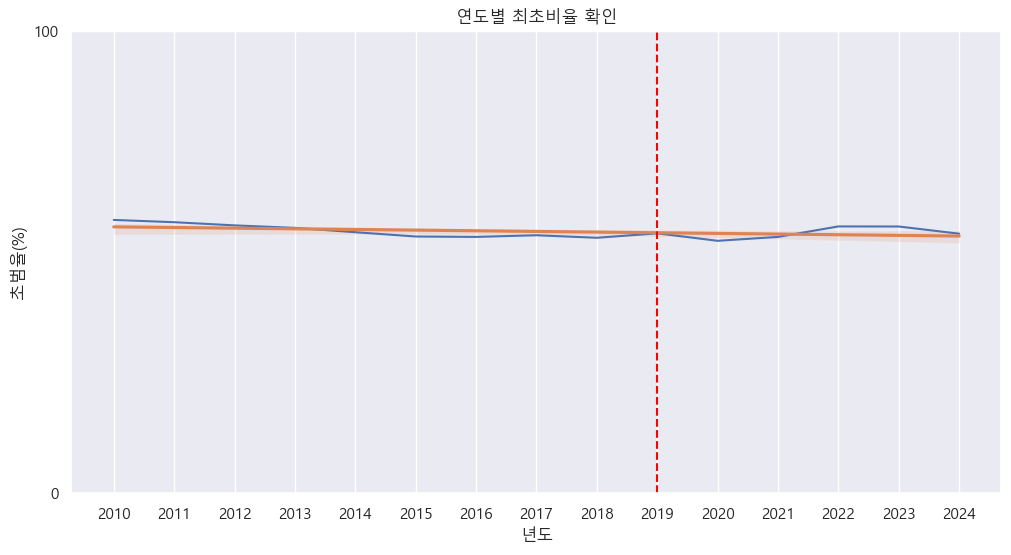

In [15]:
plt.title('연도별 최초비율 확인')
sns.lineplot(data = df, x = '년도', y = '초범율')
sns.regplot(data=df, x='년도', y='초범율', scatter=False, order=1) #추세선
plt.axvline(x = 2019, color = 'red', linestyle = '--')
plt.ylabel("초범율(%)")
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
plt.yticks([0,100])
plt.xticks(df['년도'])
plt.show()

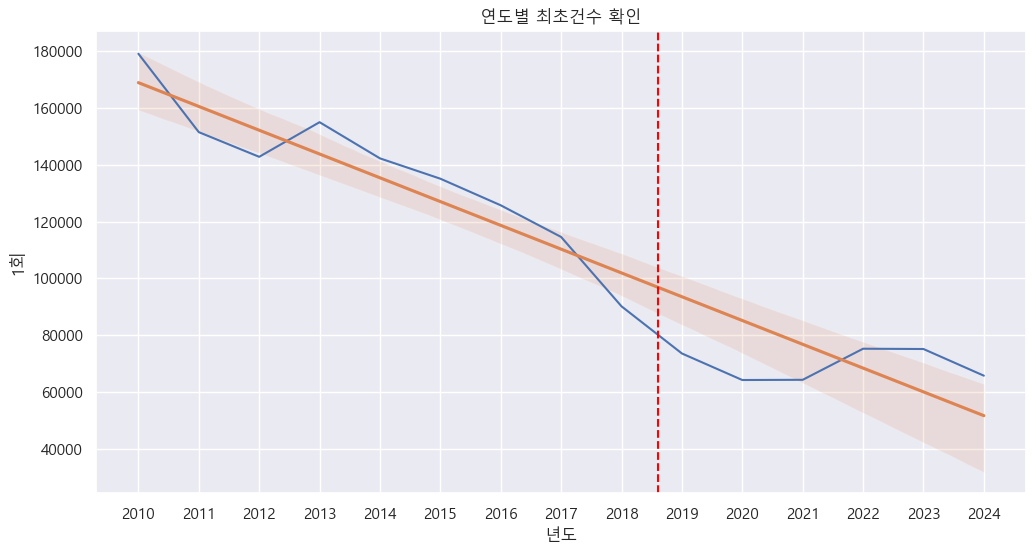

In [16]:
plt.title('연도별 최초건수 확인')
sns.lineplot(data = df, x = '년도', y = '1회')
sns.regplot(data=df, x='년도', y='1회', scatter=False, order=1) #추세선
plt.axvline(x = 2018.6, color = 'red', linestyle = '--')
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
plt.xticks(df['년도'])
plt.show()

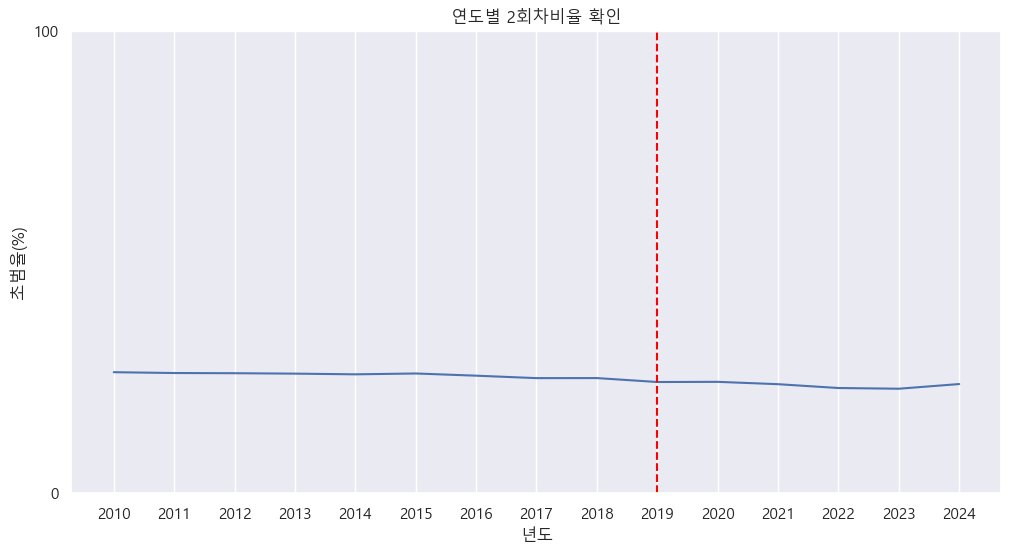

In [17]:
plt.title('연도별 2회차비율 확인')
sns.lineplot(data = df, x = '년도', y = '2회차율')
#sns.regplot(data=df, x='년도', y='2회차율', scatter=False, order=1) #추세선
plt.axvline(x = 2019, color = 'red', linestyle = '--')
plt.ylabel("초범율(%)")
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
plt.yticks([0,100])
plt.xticks(df['년도'])
plt.show()

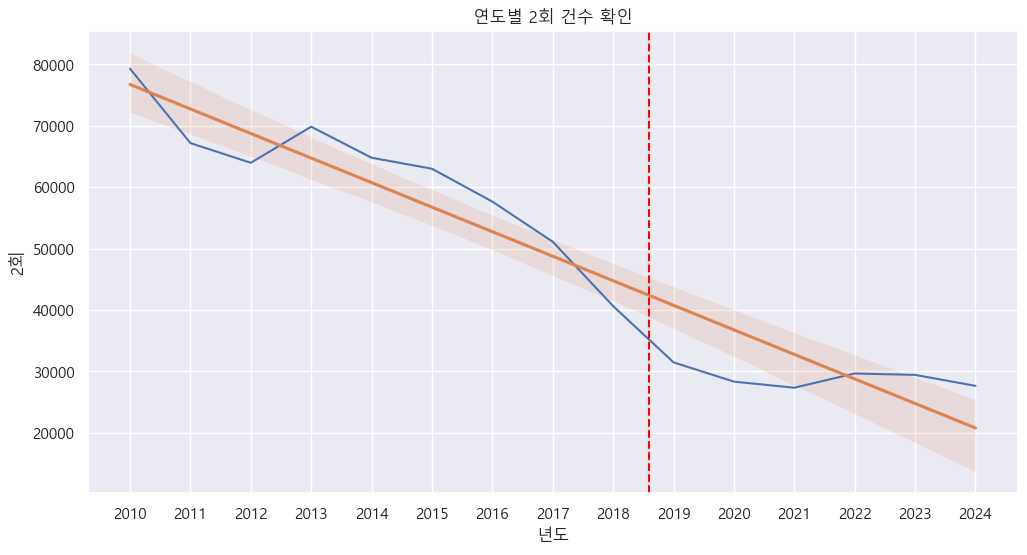

In [18]:
plt.title('연도별 2회 건수 확인')
sns.lineplot(data = df, x = '년도', y = '2회')
sns.regplot(data=df, x='년도', y='2회', scatter=False, order=1) #추세선
plt.axvline(x = 2018.6, color = 'red', linestyle = '--')
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
plt.xticks(df['년도'])
plt.show()

In [20]:
df

,년도,1회,2회,3회,4회,5회,6회,7회이상,전체,재범자수,재범률,2회차율,초범율
0,2010,179086,79314,30103,9705,3118,903,478,302707,44307,14.636926,26.201574,59.161499
1,2011,151488,67195,26172,8925,3017,929,487,258213,39530,15.309067,26.023089,58.667844
2,2012,142803,63990,25607,9094,3179,1085,525,246283,39490,16.034399,25.982305,57.983296
3,2013,154992,69863,28862,10391,3718,1285,725,269836,44981,16.669755,25.890912,57.439334
4,2014,142258,64813,28183,10534,3775,1396,829,251788,44717,17.759782,25.741100,56.499118
5,2015,135096,63018,27552,10810,4171,1556,897,243100,44986,18.505142,25.922666,55.572193
6,2016,125736,57666,25856,10494,4131,1599,1117,226599,43197,19.063191,25.448479,55.488330
7,2017,114585,51130,23396,9364,3896,1527,1289,205187,39472,19.237086,24.918733,55.844181
8,2018,90168,40648,19025,7884,3189,1280,866,163060,32244,19.774316,24.928247,55.297437
9,2019,73572,31487,14693,6416,2696,1102,806,130772,25713,19.662466,24.077784,56.259750


### 재범률 확인

In [24]:
df['재범률'] = df['재범자수'] / df['전체']

In [25]:
df['재범률']*=100

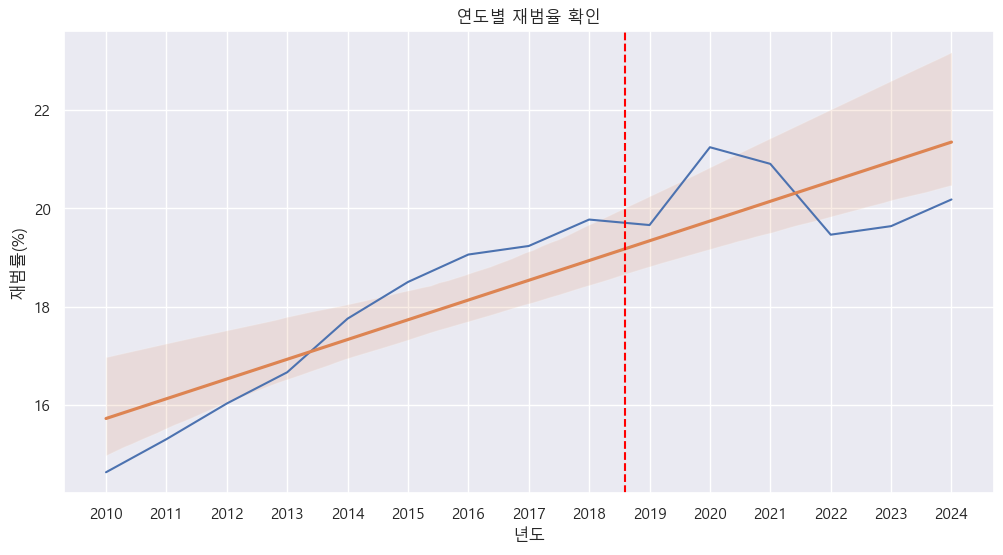

In [26]:
plt.title('연도별 재범율 확인')
sns.lineplot(data = df, x = '년도', y = '재범률')
sns.regplot(data=df, x='년도', y='재범률', scatter=False, order=1) #추세선
plt.axvline(x = 2018.6, color = 'red', linestyle = '--')
plt.ylabel("재범률(%)")
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
#plt.yticks([0,100])
plt.xticks(df['년도'])
plt.show()

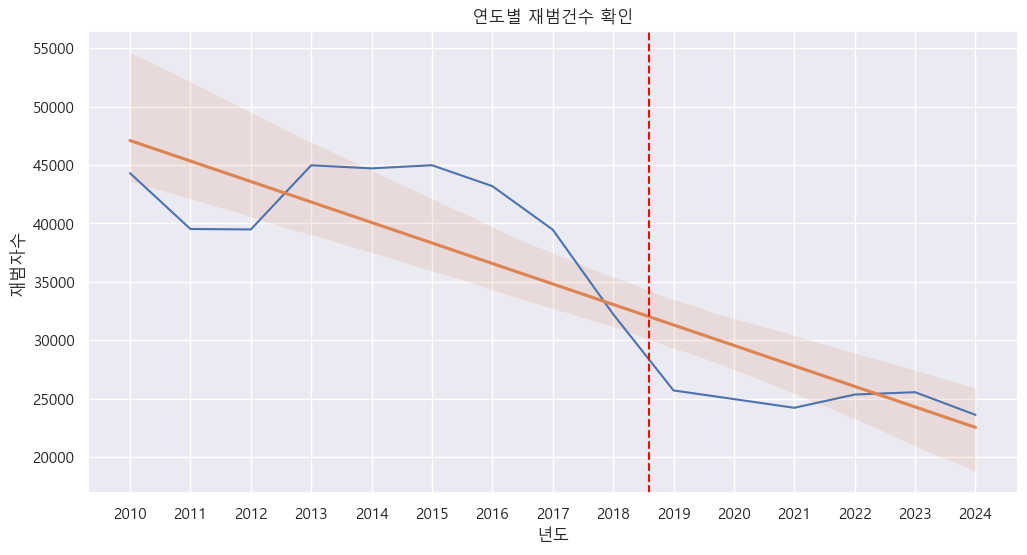

In [27]:
plt.title('연도별 재범건수 확인')
sns.lineplot(data = df, x = '년도', y = '재범자수')
sns.regplot(data=df, x='년도', y='재범자수', scatter=False, order=1) #추세선
plt.axvline(x = 2018.6, color = 'red', linestyle = '--')
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
plt.xticks(df['년도'])
plt.show()